# 필요한 라이브러리 불러오기

In [1]:
!pip install nltk
!pip install wordcloud

In [2]:
# 기본 라이브러리 호출
import pandas as pd
import numpy as np


# 시각화 라이브러리 호출
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats


# 크롤링 라이브러리 호출
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
import time
import datetime
    

# 엑셀 이용 라이브러리 호출
from openpyxl import Workbook


# 전처리
import re # 텍스트 전처리용 정규표현식 라이브러리 호출
from collections import Counter # 리스트 원소의 개수를 알기 위한 라이브러리 호출
from nltk.corpus import stopwords # 전처리 (불용어 제거 라이브러리 호출)
from nltk.tokenize import word_tokenize # 문장 토큰화, 분리화

# 텍스트 시각화 (텍스트의 중요도등에 따른 텍스트 시각화)
from wordcloud import WordCloud


import warnings 
warnings.filterwarnings('ignore')

# 크롤링할 유튜브 불러오기

In [3]:
wb = Workbook(write_only=True)
ws = wb.create_sheet() # 댓글 크롤링하기 전, 댓글을 저장할 빈 엑셀 파일 생성

driver = webdriver.Chrome("chromedriver.exe")
driver.get("https://www.youtube.com/watch?v=JaqNi-NNt24") # 불러올 유튜브 url 입력

# webdriver 을 사용시, 컴퓨터 성능과 인터넷 환경에 따라 load 하는 시간 다름. 이때 load 시간을 부여함
driver.implicitly_wait(3) # 브라우저에서 사용되는 엔진 자체에서 파싱되는 시간을 기다려 주는 메소드
time.sleep(1.5) # 프로세스 자체를 지정한 시간동안 기다려 주는 역할


# 웹페이지 끝까지 스크롤하기

In [4]:
# 스크롤을 내릴 때마다 새로운 HTML문서가 생성됨 따라서 모든 댓글을 수집하기 위해
# 웹페이지의 스크롤을 끝까지 내린 후 크롤링하면 됨

driver.execute_script("window.scrollTo(0, 800)")
time.sleep(3)

last_height = driver.execute_script("return document.documentElement.scrollHeight")

while True:
    driver.execute_script("window.scrollTo(0, document.documentElement.scrollHeight);")
    time.sleep(1.5)

    new_height = driver.execute_script("return document.documentElement.scrollHeight")
    if new_height == last_height:
        break
    last_height = new_height

time.sleep(1.5)

# 유튜브 팝업 닫기

In [5]:
# 팝업이 뜨는 것을 닫아주는 역할. 댓글을 크롤링할 때 방해가 될 수 있음

try:
    driver.find_element_by_css_selector("#dismiss-button > a").click()
except:
    pass

# 댓글 가져오기

In [6]:
html_source = driver.page_source # driver가 위치한 웹페이지의 소스 코드를 얻을 수 있는 기능
soup = BeautifulSoup(html_source, 'html.parser') # 하나의 프로그램을 런타임환경 
# (예를 들면, 브라우저 내 자바스크립트 엔진)이 실제로 행할 수 있는 내부 포맷으로 분석하고 변환하는 것

id_list = soup.select("div#header-author > h3 > #author-text > span") 
comment_list = soup.select("yt-formatted-string#content-text")

id_final = []
comment_final = []

for i in range(len(comment_list)):
    temp_id = id_list[i].text
    temp_id = temp_id.replace('\n', '')
    temp_id = temp_id.replace('\t', '')
    temp_id = temp_id.replace('    ', '')
    id_final.append(temp_id) # 댓글 작성자

    temp_comment = comment_list[i].text
    temp_comment = temp_comment.replace('\n', '')
    temp_comment = temp_comment.replace('\t', '')
    temp_comment = temp_comment.replace('    ', '')
    comment_final.append(temp_comment) # 댓글 내용

# 댓글 저장하기

In [7]:
pd_data = {"아이디" : id_final , "댓글 내용" : comment_final}
youtube_pd = pd.DataFrame(pd_data)

youtube_pd.to_excel('result.xlsx')

In [8]:
youtube_pd

,아이디,댓글 내용
0,Brandon Moore,"Wow, man. I've never ridden a high-speed train..."
1,lalamia,I’m from Busan and moved to LA in 2015. I was ...
2,aipooalice,I’m definitely missing Audrey in this trip but...
3,Brady Marshall,Can you please add this video to your playlist...
4,Grady Zyner,I'm glad to see that you've made friends with ...
...,...,...
69,kamuzu,The Brokeback Boys are back in action............
70,SK,What the....that yellow guy..
71,Theology Mukbang,Where's Audrey?
72,kittichai wajidee,how is kim


# 댓글 모음 엑셀 불러오기

In [9]:
youtube_comments = pd.read_excel('C:\\k_digital\\source\\result.xlsx')

In [10]:
youtube_comments

,Unnamed: 0,아이디,댓글 내용
0,0,Brandon Moore,"Wow, man. I've never ridden a high-speed train..."
1,1,lalamia,I’m from Busan and moved to LA in 2015. I was ...
2,2,aipooalice,I’m definitely missing Audrey in this trip but...
3,3,Brady Marshall,Can you please add this video to your playlist...
4,4,Grady Zyner,I'm glad to see that you've made friends with ...
...,...,...,...
69,69,kamuzu,The Brokeback Boys are back in action............
70,70,SK,What the....that yellow guy..
71,71,Theology Mukbang,Where's Audrey?
72,72,kittichai wajidee,how is kim


In [11]:
# 정규 표현식
# 댓글에 있는 모든 영어 문장을 단어로 저장 

word_lst = []
p = re.compile('[a-zA-Z]+') # a-zA-Z를 포함한 + (단어) 추출
for i in range(len(youtube_comments['댓글 내용'])):
    pp = p.findall(youtube_comments['댓글 내용'][i])
    word_lst.append(pp)
    
print(word_lst)

[['Wow', 'man', 'I', 've', 'never', 'ridden', 'a', 'high', 'speed', 'train', 'but', 'the', 'KTX', 'looks', 'really', 'cool', 'I', 'really', 'want', 'to', 'ride', 'one', 'someday', 'just', 'to', 'have', 'the', 'experience', 'Busan', 'looks', 'really', 'cool', 'I', 'definitely', 'get', 'the', 'port', 'vibe', 'from', 'what', 'I', 'm', 'seeing', 'It', 'looks', 'really', 'relaxed', 'and', 'chill', 'I', 'm', 'really', 'glad', 'you', 'guys', 'got', 'to', 'explore', 'it', 'more', 'later', 'in', 'your', 'trip', 'And', 'the', 'food', 'in', 'that', 'buffet', 'looks', 'amazing'], ['I', 'm', 'from', 'Busan', 'and', 'moved', 'to', 'LA', 'in', 'I', 'was', 'supposed', 'to', 'go', 'to', 'Busan', 'to', 'visit', 'my', 'family', 'and', 'friends', 'but', 'couldn', 't', 'make', 'it', 'due', 'to', 'Covid', 'I', 'found', 'your', 'video', 'of', 'Osaka', 'and', 'Busan', 'and', 'have', 'been', 'watching', 'all', 'of', 'them', 'and', 'I', 'love', 'them', 'Thank', 'you', 'so', 'much', 'for', 'the', 'videos'], ['I'

In [12]:
# 2차원 리스트로 저장되어 있는 것을 그냥 리스트에 1차원으로 다 저장 

new_lst = []
for i in word_lst:
    for j in range(len(i)):
        new_lst.append(i[j])

In [13]:
# 위 리스트의 단어 소문자화

lower_lst = []
for i in new_lst:
    lower_lst.append(i.lower())
print(lower_lst)

['wow', 'man', 'i', 've', 'never', 'ridden', 'a', 'high', 'speed', 'train', 'but', 'the', 'ktx', 'looks', 'really', 'cool', 'i', 'really', 'want', 'to', 'ride', 'one', 'someday', 'just', 'to', 'have', 'the', 'experience', 'busan', 'looks', 'really', 'cool', 'i', 'definitely', 'get', 'the', 'port', 'vibe', 'from', 'what', 'i', 'm', 'seeing', 'it', 'looks', 'really', 'relaxed', 'and', 'chill', 'i', 'm', 'really', 'glad', 'you', 'guys', 'got', 'to', 'explore', 'it', 'more', 'later', 'in', 'your', 'trip', 'and', 'the', 'food', 'in', 'that', 'buffet', 'looks', 'amazing', 'i', 'm', 'from', 'busan', 'and', 'moved', 'to', 'la', 'in', 'i', 'was', 'supposed', 'to', 'go', 'to', 'busan', 'to', 'visit', 'my', 'family', 'and', 'friends', 'but', 'couldn', 't', 'make', 'it', 'due', 'to', 'covid', 'i', 'found', 'your', 'video', 'of', 'osaka', 'and', 'busan', 'and', 'have', 'been', 'watching', 'all', 'of', 'them', 'and', 'i', 'love', 'them', 'thank', 'you', 'so', 'much', 'for', 'the', 'videos', 'i', 'm'

In [14]:
# 영어 불용어 리스트 확인

stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [15]:
# 불용어를 제외한 단어 리스트에 담기

result = [word for word in lower_lst if not word in stopwords.words('english')]
result

['wow',
 'man',
 'never',
 'ridden',
 'high',
 'speed',
 'train',
 'ktx',
 'looks',
 'really',
 'cool',
 'really',
 'want',
 'ride',
 'one',
 'someday',
 'experience',
 'busan',
 'looks',
 'really',
 'cool',
 'definitely',
 'get',
 'port',
 'vibe',
 'seeing',
 'looks',
 'really',
 'relaxed',
 'chill',
 'really',
 'glad',
 'guys',
 'got',
 'explore',
 'later',
 'trip',
 'food',
 'buffet',
 'looks',
 'amazing',
 'busan',
 'moved',
 'la',
 'supposed',
 'go',
 'busan',
 'visit',
 'family',
 'friends',
 'make',
 'due',
 'covid',
 'found',
 'video',
 'osaka',
 'busan',
 'watching',
 'love',
 'thank',
 'much',
 'videos',
 'definitely',
 'missing',
 'audrey',
 'trip',
 'david',
 'make',
 'fantastic',
 'duo',
 'please',
 'add',
 'video',
 'playlist',
 'south',
 'korea',
 'travel',
 'korean',
 'food',
 'korean',
 'culture',
 'videos',
 'seems',
 'make',
 'sense',
 'busan',
 'south',
 'korea',
 'buffet',
 'one',
 'thing',
 'guys',
 'tried',
 'glad',
 'see',
 'made',
 'friends',
 'chris',
 'love',

In [78]:
# 불필요한 단어 (video, guys, audrey, videos, vlogs, david, sam, ch, broth, samuel, chris, man) 제외한 단어 리스트에 담기

unnecessary_words = ['video', 'guys', 'audrey', 'videos', 'vlogs', 'david', 'sam', 'ch',
                     'kim','broth', 'samuel', 'chris', 'man', 'este''oh', 'haha','whoa','x' 'oh','korean',
                    'busan','korea','really','buffet','please','wow','well','seoul','lol','love','like','get','looks',
                     'much','great', 'one','good','la','ya','due','two','oh','espa','su']
                     
result = [word for word in result if not word in unnecessary_words]
result

['never',
 'ridden',
 'high',
 'speed',
 'train',
 'ktx',
 'cool',
 'want',
 'ride',
 'someday',
 'experience',
 'cool',
 'definitely',
 'port',
 'vibe',
 'seeing',
 'relaxed',
 'chill',
 'glad',
 'got',
 'explore',
 'later',
 'trip',
 'food',
 'amazing',
 'moved',
 'supposed',
 'go',
 'visit',
 'family',
 'friends',
 'make',
 'covid',
 'found',
 'osaka',
 'watching',
 'thank',
 'definitely',
 'missing',
 'trip',
 'make',
 'fantastic',
 'duo',
 'add',
 'playlist',
 'south',
 'travel',
 'food',
 'culture',
 'seems',
 'make',
 'sense',
 'south',
 'thing',
 'tried',
 'glad',
 'see',
 'made',
 'friends',
 'travel',
 'channel',
 'fact',
 'found',
 'channel',
 'looking',
 'forward',
 'viewing',
 'future',
 'adventures',
 'fun',
 'watch',
 'enthusiasm',
 'infectious',
 'way',
 'amazing',
 'work',
 'thanks',
 'always',
 'sharing',
 'adventures',
 'many',
 'blessings',
 'everyone',
 'making',
 'vids',
 'happen',
 'next',
 'time',
 'also',
 'try',
 'buffets',
 'trust',
 'im',
 'huge',
 'foodie',

In [79]:
# 글자 수 세기 

count = Counter(result)
word = dict(count.most_common())
print(word)

{'food': 9, 'train': 7, 'time': 6, 'nice': 6, 'trip': 5, 'going': 5, 'amazing': 4, 'found': 4, 'watching': 4, 'travel': 4, 'see': 4, 'many': 4, 'cool': 3, 'go': 3, 'make': 3, 'thanks': 3, 'always': 3, 'next': 3, 'also': 3, 'miss': 3, 'shirt': 3, 'find': 3, 'lot': 3, 'country': 3, 'vist': 3, 'eat': 3, 'never': 2, 'high': 2, 'speed': 2, 'ktx': 2, 'want': 2, 'ride': 2, 'definitely': 2, 'glad': 2, 'visit': 2, 'friends': 2, 'missing': 2, 'fantastic': 2, 'south': 2, 'culture': 2, 'tried': 2, 'channel': 2, 'future': 2, 'adventures': 2, 'fun': 2, 'enthusiasm': 2, 'way': 2, 'try': 2, 'im': 2, 'huge': 2, 'look': 2, 'omg': 2, 'seen': 2, 'enjoyed': 2, 'hopefully': 2, 'think': 2, 'city': 2, 'wearing': 2, 'name': 2, 'en': 2, 'este': 2, 'canal': 2, 'real': 2, 'talks': 2, 'fresh': 2, 'fish': 2, 'back': 2, 'past': 2, 'x': 2, 'tourism': 2, 'together': 2, 'largest': 2, 'efficient': 2, 'ruin': 2, 'first': 2, 'hotel': 2, 'milk': 2, 'tea': 2, 'full': 2, 'zombies': 2, 'yellow': 2, 'anything': 2, 'ridden': 1,

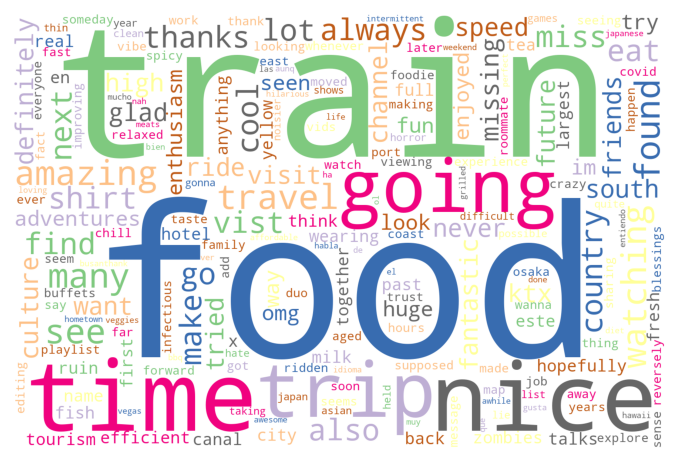

In [80]:
# 텍스트 시각화

matplotlib.rc('font', family='D2coding')
set_matplotlib_formats('retina')
matplotlib.rc('axes', unicode_minus = False)

wordcloud = WordCloud(
background_color='white',colormap = "Accent_r", width=1500, \
height=1000).generate_from_frequencies(word)
plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()

In [81]:
top_20 = []
for i in range(20):
    top_20.append(list(word.items())[i])
top_20

[('food', 9),
 ('train', 7),
 ('time', 6),
 ('nice', 6),
 ('trip', 5),
 ('going', 5),
 ('amazing', 4),
 ('found', 4),
 ('watching', 4),
 ('travel', 4),
 ('see', 4),
 ('many', 4),
 ('cool', 3),
 ('go', 3),
 ('make', 3),
 ('thanks', 3),
 ('always', 3),
 ('next', 3),
 ('also', 3),
 ('miss', 3)]